In [30]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import spotipy 
from spotipy.oauth2 import SpotifyClientCredentials
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
import calendar

In [23]:
#df = pd.read_json('MyData/Streaming_History_Audio_2020-2022_0.json')
df = pd.read_json('Data/endsong_1.json')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10181 entries, 0 to 10180
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ts                                 10181 non-null  object 
 1   username                           10181 non-null  object 
 2   platform                           10181 non-null  object 
 3   ms_played                          10181 non-null  int64  
 4   conn_country                       10181 non-null  object 
 5   ip_addr_decrypted                  10181 non-null  object 
 6   user_agent_decrypted               10093 non-null  object 
 7   master_metadata_track_name         10181 non-null  object 
 8   master_metadata_album_artist_name  10181 non-null  object 
 9   master_metadata_album_album_name   10181 non-null  object 
 10  spotify_track_uri                  10181 non-null  object 
 11  episode_name                       0 non-null      flo

In [24]:
df = df.drop(['platform', 'username', 'conn_country', 'user_agent_decrypted', 'shuffle', 'offline', 'ip_addr_decrypted', 'episode_name', 'episode_show_name', 'spotify_episode_uri', 'incognito_mode'], axis=1)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10181 entries, 0 to 10180
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ts                                 10181 non-null  object 
 1   ms_played                          10181 non-null  int64  
 2   master_metadata_track_name         10181 non-null  object 
 3   master_metadata_album_artist_name  10181 non-null  object 
 4   master_metadata_album_album_name   10181 non-null  object 
 5   spotify_track_uri                  10181 non-null  object 
 6   reason_start                       10181 non-null  object 
 7   reason_end                         10181 non-null  object 
 8   skipped                            6326 non-null   float64
 9   offline_timestamp                  10181 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 795.5+ KB


In [42]:
df1.head() 

,ts,ms_played,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,reason_start,reason_end,skipped,offline_timestamp
0,2022-05-04T19:46:56Z,55822,From The Ground,Hollywood Undead,Notes From The Underground - Unabridged,spotify:track:35ApxgMbcYwrDHTIU9DkbF,fwdbtn,endplay,NaN,1651693560607
1,2022-05-04T19:46:57Z,624,Mother Murder,Hollywood Undead,American Tragedy,spotify:track:0G0ipwqCpixu2x97K39D6R,clickrow,endplay,NaN,1651693616808
2,2022-05-04T19:46:59Z,2316,Reach,Skillet,Victorious,spotify:track:2Nu3kY3OBct3eSevD4ivA5,clickrow,endplay,NaN,1651693617756
3,2022-05-04T19:51:09Z,249600,Mother Murder,Hollywood Undead,American Tragedy,spotify:track:0G0ipwqCpixu2x97K39D6R,clickrow,trackdone,NaN,1651693620533
4,2022-05-04T19:54:31Z,202613,Reach,Skillet,Victorious,spotify:track:2Nu3kY3OBct3eSevD4ivA5,trackdone,trackdone,NaN,1651693869590


In [25]:
grouped_album = df.groupby('master_metadata_album_album_name')['ms_played'].sum() / 60000
grouped_artist = df.groupby('master_metadata_album_artist_name')['ms_played'].sum()/ 60000
grouped_track = df.groupby('master_metadata_track_name')['ms_played'].sum()/ 60000

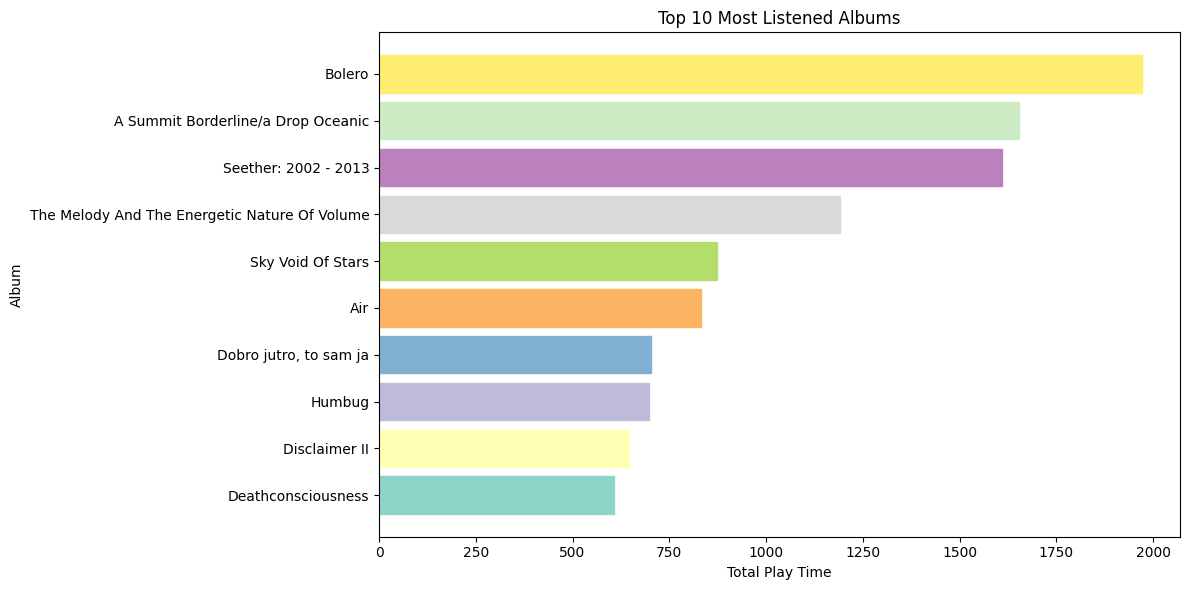

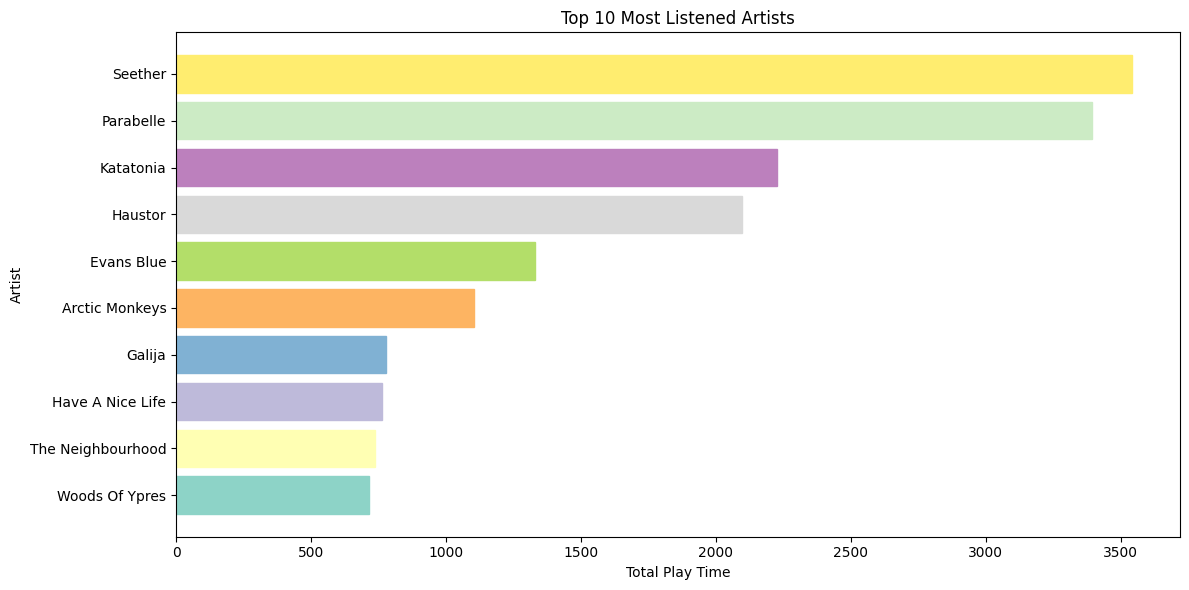

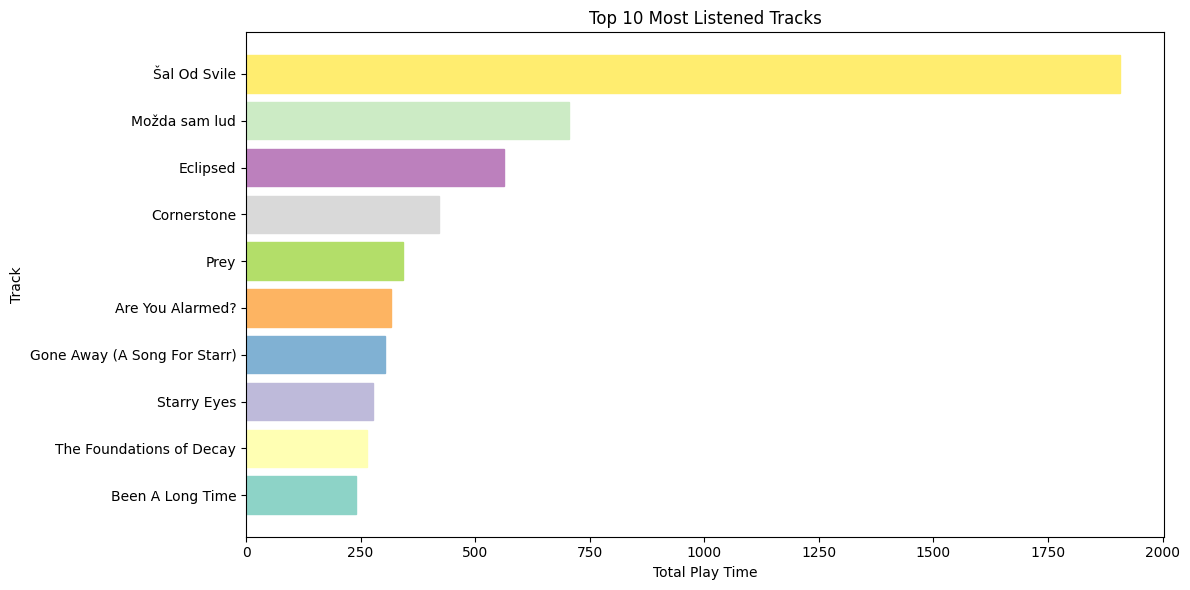

In [44]:
N = 10

# Get the top N most listened to albums, artists, and tracks
top_albums = grouped_album.nlargest(N)[::-1]
top_artists = grouped_artist.nlargest(N)[::-1]
top_tracks = grouped_track.nlargest(N)[::-1]

colors = plt.cm.Set3(np.linspace(0, 1, N))
# Plot the top N most listened albums
plt.figure(figsize=(12, 6))
bars = plt.barh(top_albums.index, top_albums.values)
for i, bar in enumerate(bars):
    bar.set_color(colors[i])
plt.ylabel('Album')
plt.xlabel('Total Play Time')
plt.title(f'Top {N} Most Listened Albums')
plt.tight_layout()
plt.show()

# Plot the top N most listened artists
plt.figure(figsize=(12, 6))
bars = plt.barh(top_artists.index, top_artists.values)
for i, bar in enumerate(bars):
    bar.set_color(colors[i])
plt.ylabel('Artist')
plt.xlabel('Total Play Time')
plt.title(f'Top {N} Most Listened Artists')

plt.tight_layout()
plt.show()

# Plot the top N most listened tracks
plt.figure(figsize=(12, 6))
bars = plt.barh(top_tracks.index, top_tracks.values)
for i, bar in enumerate(bars):
    bar.set_color(colors[i])
plt.ylabel('Track')
plt.xlabel('Total Play Time')
plt.title(f'Top {N} Most Listened Tracks')
plt.tight_layout()
plt.show()

In [ ]:
df['ts'] = pd.to_datetime(df['ts'])
df.set_index('ts', inplace=True)

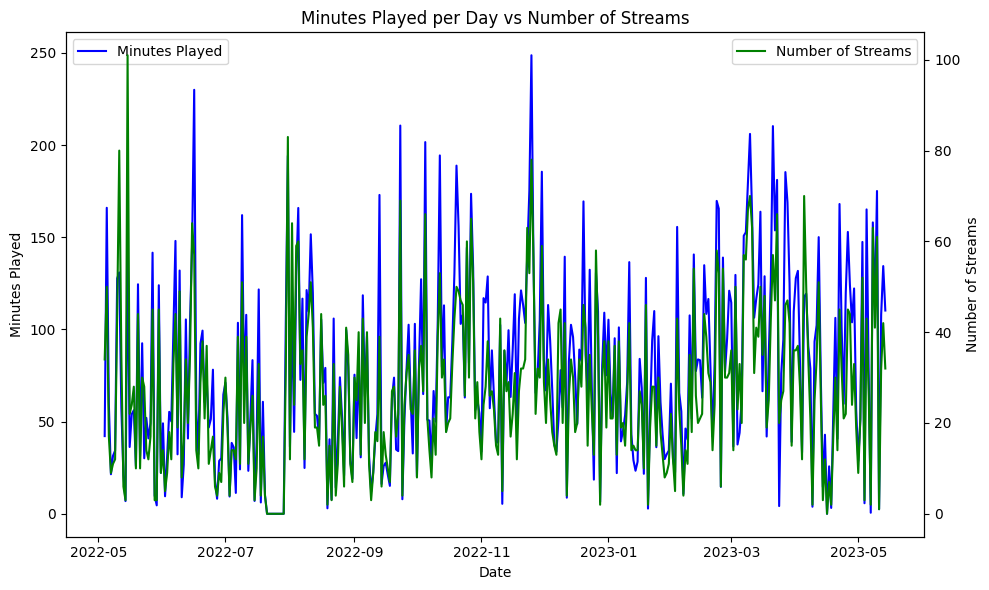

In [28]:
daily_minutes_played = df['ms_played'].resample('D').sum() / 60000
daily_streams = df['ms_played'].resample('D').count()

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()
ax1.plot(daily_minutes_played.index, daily_minutes_played, color='blue', label='Minutes Played')
ax1.set_ylabel('Minutes Played')

ax2.plot(daily_streams.index, daily_streams, color='green', label='Number of Streams')
ax2.set_ylabel('Number of Streams')
ax1.set_xlabel('Date')
ax1.set_title('Minutes Played per Day vs Number of Streams')


ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

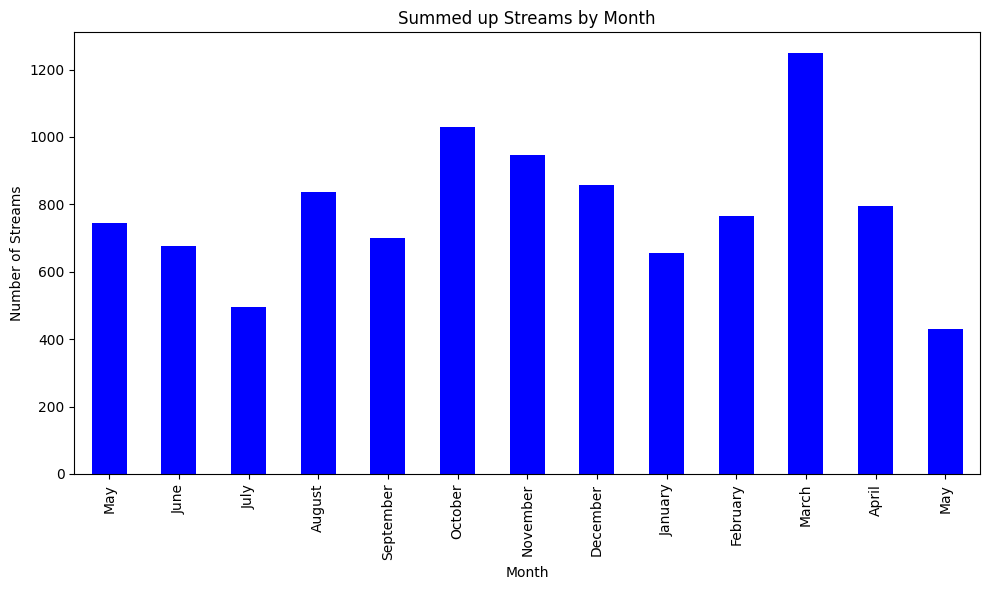

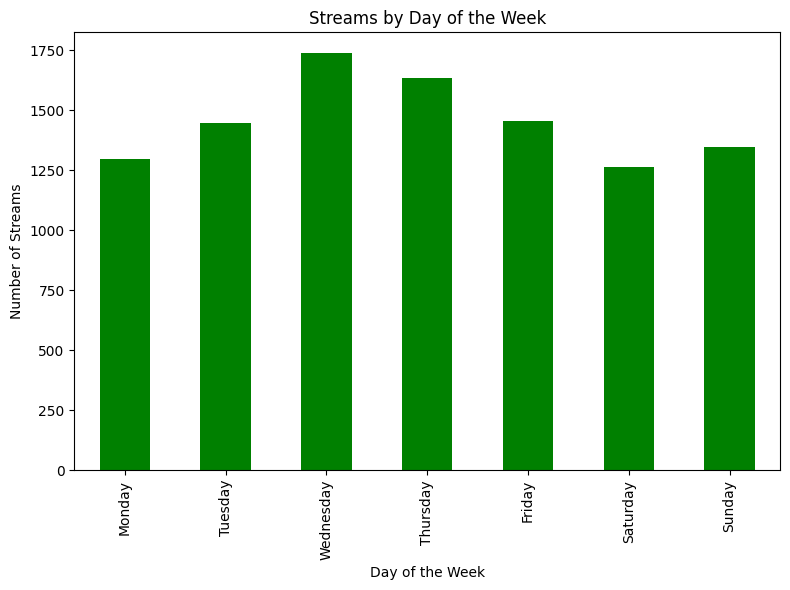

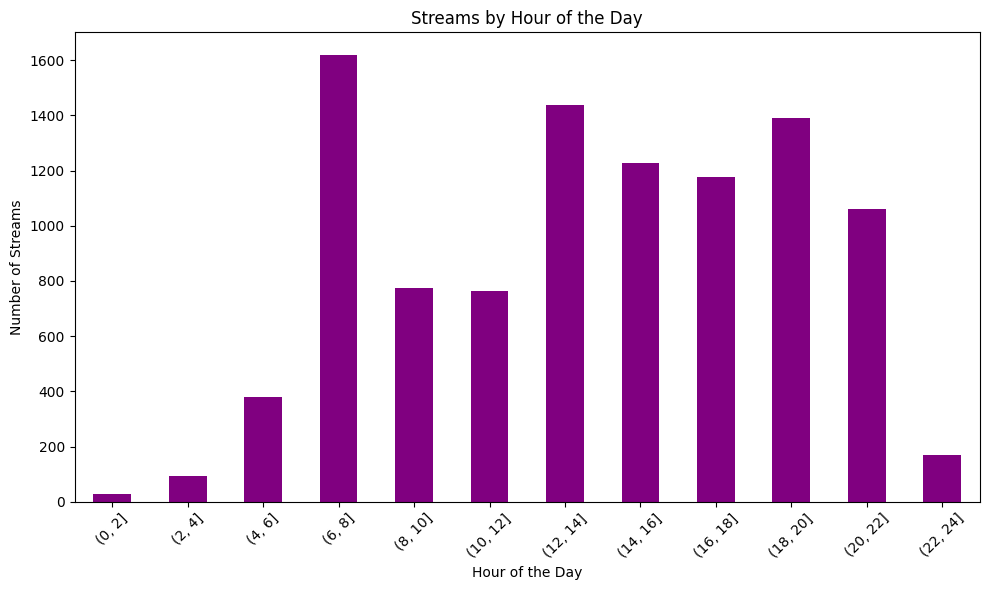

Total Minutes Streamed: 29105.84


In [31]:

monthly_streams = df['ms_played'].resample('M').count()

monthly_streams.index = monthly_streams.index.strftime('%B')
weekday_streams = df['ms_played'].groupby(df.index.weekday).count()
hourly_streams = df['ms_played'].groupby(pd.cut(df.index.hour, bins=range(0, 25, 2))).count()

total_minutes_streamed = df['ms_played'].sum() / 60000

plt.figure(figsize=(10, 6))
monthly_streams.plot(kind='bar', color='blue')
plt.xlabel('Month')
plt.ylabel('Number of Streams')
plt.title('Summed up Streams by Month')
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 6))
weekday_streams.plot(kind='bar', color='green')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Streams')
plt.title('Streams by Day of the Week')
plt.xticks(range(7), [calendar.day_name[i] for i in range(7)])
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
hourly_streams.plot(kind='bar', color='purple')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Streams')
plt.title('Streams by Hour of the Day')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f'Total Minutes Streamed: {total_minutes_streamed:.2f}')

In [4]:
import time
client_id = '7151d6264f47434c81d8732ad55101b4'
client_secret = 'f4136acc74354f23b128e999296198bc'
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))

df_subset = df.tail(5181)

def get_audio_features(uri):
    track_id = uri.split(':')[-1]  
    retry_count = 0
    while retry_count < 3:
        try:
            audio_features = sp.audio_features([track_id])[0]
            return audio_features
        except spotipy.SpotifyException as e: # Made this because I was having problems with 429 failures
            if e.http_status == 429:
                print("Rate limit exceeded")
                time.sleep(5)  
                retry_count += 1
            else:
                raise e
    print(f"Failed to retrieve audio features for track URI: {uri}")
    return None

#resultdf = pd.DataFrame(columns=['Track ID', 'Track Name', 'Artist Name', 'Acousticness', 'Danceability', 'Energy', 'Instrumentalness', 'Liveness', 'Loudness', 'Speechiness', 'Valence', 'Tempo'])

audio_features_list = []
for uri in df_subset['spotify_track_uri']:
    audio_features = get_audio_features(uri)
    audio_features_list.append(audio_features)

#this is because it limits 10k api requests per day... so i had to do it in 2 batches
audio_features_df = pd.DataFrame(audio_features_list)
audio_features_df.to_csv("drugideo.csv")

In [3]:
df = pd.concat([pd.read_csv("prvideo.csv"), pd.read_csv("drugideo.csv")])
df['ts'] = pd.to_datetime(df1['ts'])

In [4]:
# dodaj ts kolonu iz prvog datafrejma, direktno na ovaj kompletni i onda uradi prosecno po danu, to ima smisla.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10181 entries, 0 to 5180
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   Unnamed: 0        10181 non-null  int64              
 1   danceability      10181 non-null  float64            
 2   energy            10181 non-null  float64            
 3   key               10181 non-null  int64              
 4   loudness          10181 non-null  float64            
 5   mode              10181 non-null  int64              
 6   speechiness       10181 non-null  float64            
 7   acousticness      10181 non-null  float64            
 8   instrumentalness  10181 non-null  float64            
 9   liveness          10181 non-null  float64            
 10  valence           10181 non-null  float64            
 11  tempo             10181 non-null  float64            
 12  type              10181 non-null  object             
 13  id

In [6]:
audio_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence', 'tempo']
df_grouped = df.groupby('ts')[audio_features].mean().reset_index()
df_grouped.set_index('ts', inplace=True)

In [7]:

df_monthly = df_grouped.resample('D')[audio_features].mean()

scaler = MinMaxScaler()
df_monthly_normalized = pd.DataFrame(scaler.fit_transform(df_grouped), columns=df_grouped.columns, index=df_grouped.index)


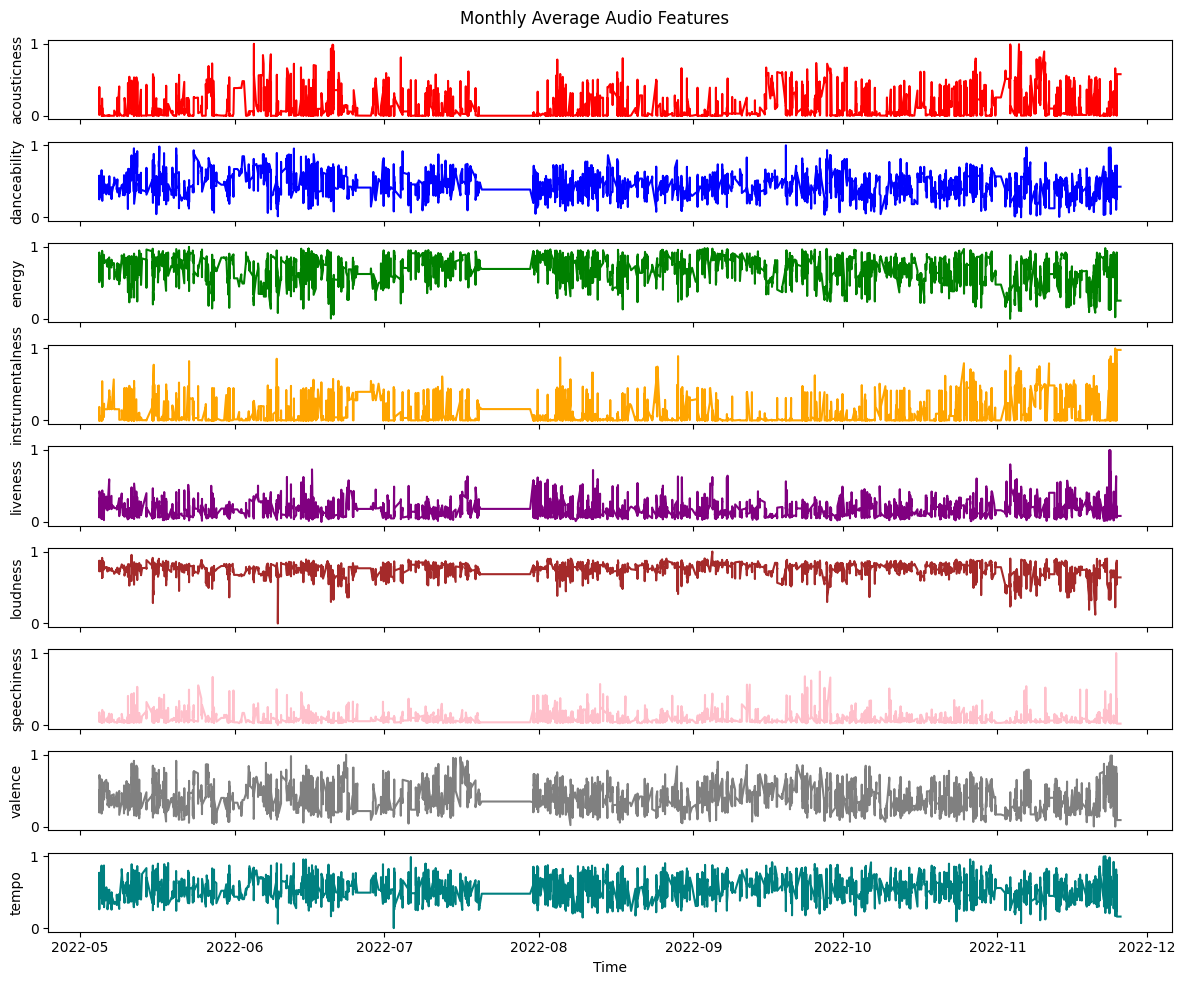

In [8]:
fig, axs = plt.subplots(len(audio_features), 1, figsize=(12, 10), sharex=True)
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'teal']

# Iterate over each audio feature
for i, feature in enumerate(audio_features):
    axs[i].plot(df_monthly_normalized.index, df_monthly_normalized[feature], color=colors[i])
    axs[i].set_ylabel(feature)

# Customize the plot
plt.xlabel('Time')
plt.suptitle('Monthly Average Audio Features')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

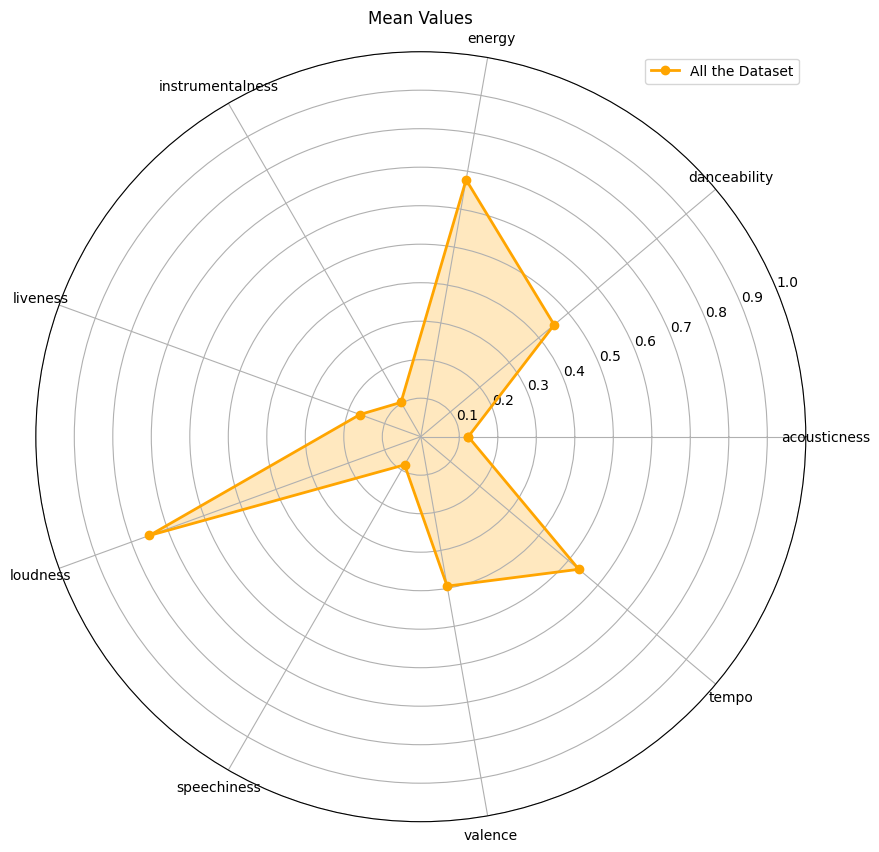

In [20]:
scaler = MinMaxScaler()
df_grouped = pd.DataFrame(scaler.fit_transform(df_grouped), columns=df_grouped.columns, index=df_grouped.index)
labels = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence', 'tempo']
features_all = df_grouped[labels].mean().tolist()


angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False)
angles = np.concatenate((angles, [angles[0]])) 

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, polar=True)

ax.plot(angles, features_all + [features_all[0]], 'o-', linewidth=2, label="All the Dataset", color='orange')
ax.fill(angles, features_all + [features_all[0]], alpha=0.25, facecolor='orange')

ax.set_xticks(angles[:-1])  
ax.set_xticklabels(labels)  

ax.set_yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]) 
ax.set_ylim(0, 1)

ax.set_title('Mean Values')
ax.grid(True)
plt.legend(loc='best')

plt.show()


In [21]:
df_grouped.head()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
ts,,,,,,,,,
2022-05-04 19:46:56+00:00,0.032788,0.537856,0.823572,0.000103,0.104971,0.835532,0.052067,0.348273,0.667075
2022-05-04 19:46:57+00:00,0.029532,0.430452,0.822372,0.000002,0.115982,0.823062,0.070279,0.266522,0.701683
2022-05-04 19:46:59+00:00,0.029449,0.477347,0.908785,0.000010,0.112311,0.847010,0.120000,0.292248,0.615708
2022-05-04 19:51:09+00:00,0.029532,0.430452,0.822372,0.000002,0.115982,0.823062,0.070279,0.266522,0.701683
2022-05-04 19:54:31+00:00,0.029449,0.477347,0.908785,0.000010,0.112311,0.847010,0.120000,0.292248,0.615708
